In [1]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets
import matplotlib.pyplot as plt

## 1. Implement LDA (40 points)

Implement your own class to carry out two-class LDA. Use setosa-virginica, setosaversicolor, or versicolor-virginica in the iris dataset to test and compare your results
with LDA in sklearn.


In [47]:
class LDA2classes:
    
    
    def doLDA(self,dataset_file,class1,class2):
        self.dataset_file = dataset_file
        self.class1 = class1
        self.class2 = class2
        data = pd.read_csv(self.dataset_file)
        #df.iloc[:,-1:] group1 = data[data["label"] == self.class1]
        group1 = data[data.iloc[:,-1] == self.class1]
        group2 = data[data.iloc[:,-1] == self.class2]
        
        # TO DO: Calculate μ1 and μ2.
        
            #Creating μ1 from group1 
        list1 = []
        for a in range(group1.shape[1]-1):
            list1.append(0)
        x1 = np.array(list1)
        for b in range(group1.shape[0]):
            x1 = np.add(x1,group1.iloc[b,0:group1.shape[1]-1])
        μ1 = x1/group1.shape[0]
        #print(μ1,"\n")
        
            #Creating μ2 from group2
        list2 = []
        for c in range(group2.shape[1]-1):
            list2.append(0)
        x2 = np.array(list2)
        for d in range(group2.shape[0]):
            x2 = np.add(x2,group2.iloc[d,0:group2.shape[1]-1])
        μ2 = x2/group2.shape[0]
        #print(μ2,"\n")
        
        # TO DO: Create the scatter matrices and find S_within
            # S1 + S2 = S_within
        
        n = group1.shape[1]-1
        final_list = []
        temp_list = []

        for i in range(n):
            for j in range(n):
                temp_list.append(0)
            final_list.append(temp_list)
            temp_list = []

        S1 = np.asmatrix(np.asarray(final_list), dtype='float')
        #S1 = np.matrix('0 0; 0 0')
        for i in range(group1.shape[0]):
            m1 = np.subtract(group1.iloc[i,0:group1.shape[1]-1],μ1) # (X - μ1) 1xd
            m1 = np.asmatrix(m1)
            #print(m1,"\n",type(m1),"\n")
            m2 = m1.T  # (X - μ1)^T dx1
            #print(m2,"\n",type(m2),"\n")
            #S1 = np.add(S1,np.matmul(m2,m1))
            S1 = np.add(S1,np.dot(m2,m1))
           
        #print(S1,"\n")
        
        n = group2.shape[1]-1
        final_list = []
        temp_list = []

        for i in range(n):
            for j in range(n):
                temp_list.append(0)
            final_list.append(temp_list)
            temp_list = []

        S2 = np.asmatrix(np.asarray(final_list), dtype='float')
        #S2 = np.matrix('0 0; 0 0')
        for i in range(group2.shape[0]):
            m1 = np.subtract(group2.iloc[i,0:group2.shape[1]-1],μ2) # (X - μ2) 1xd
            m1 = np.asmatrix(m1)
            m2 = m1.T # (X - μ2)^T dx1
            #S2 = np.add(S2,np.matmul(m2,m1))
            S2 = np.add(S2,np.dot(m2,m1))
        
        #print(S2,"\n")
        
        S_within = np.add(S1,S2)
        
        print(S_within)
        print(S_within.shape)

        # TO DO: Use the calculated S_within, μ1, and μ2 to find W*
            # W = S_within^-1 * (μ1 - μ2)

        S_within_inverse = np.linalg.inv(S_within)
        μ1_minus_μ2 = np.subtract(μ1,μ2)

        W = np.matmul(S_within_inverse, μ1_minus_μ2)
        
        # TO DO: Compute the variance
        
        MuY1 = np.matmul(μ1,W.T)
        #print(MuY1,type(MuY1))
        MuY2 = np.matmul(μ2,W.T)
        
        yScatter1 = 0
        for i in range(group1.shape[0]):
            Y_minus_MuY1 = np.matmul(np.asmatrix(group1.iloc[i,0:group1.shape[1]-1]),W.T).item() - MuY1.item()
            #print("Y_minus_MuY1: ", Y_minus_MuY1)
            Y_minus_MuY1_sq = Y_minus_MuY1**2
            yScatter1 = yScatter1 + Y_minus_MuY1_sq
            
        yScatter2 = 0
        for i in range(group2.shape[0]):
            Y_minus_MuY2 = np.matmul(np.asmatrix(group2.iloc[i,0:group2.shape[1]-1]),W.T).item() - MuY2.item()
            #print("Y_minus_MuY1: ", Y_minus_MuY1)
            Y_minus_MuY2_sq = Y_minus_MuY2**2
            yScatter2 = yScatter2 + Y_minus_MuY2_sq
            
        LDA_results = {'W':W,
                       'variance':[yScatter1,yScatter2]}
        
        return LDA_results
    
    
    
    

In [3]:
class DoPCA:
        
    def PCA(self, matrix, transposed):
        self.matrix = matrix
        self.transposed = transposed
    
        
        ### New
        if self.transposed == True:
            matrix = self.matrix.T
        else:
            matrix = self.matrix
        ###
        
        #matrix = pd.read_csv(self.matrix)
        
        #matrix = matrix[matrix.iloc[:,0:matrix.shape[1]-1]]
        
        """
        # (1) Do mean centering
        #meanCenteredData = self.matrix - np.mean(self.matrix, axis=0)
        column_mean = matrix.mean(axis=0)
        column_mean_stacked = np.tile(column_mean, reps=(matrix.shape[0], 1))
        meanCenteredData = matrix - column_mean_stacked
        """
        
        
        # (2) Compute the covariance matrix using numpy.cov()
        """if self.transposed == True:
            covMatrix = np.cov(meanCenteredData.T, rowvar=False)
        else:
            covMatrix = np.cov(meanCenteredData, rowvar=False)
        """
        covMatrix = np.cov(matrix, rowvar=False)
        
        # (3) Perform eigen-decomposition using numpy.linalg.eig()
        w,v = np.linalg.eig(covMatrix)
        w = w.real
        v = v.real
        
        sortIndex = w.argsort()[::-1]
        eigenvalues = w[sortIndex]
        eigenvectors = v[:,sortIndex]
        
        # (4). Project the data onto the principal component axes.
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.set_title('Raw Data and PC Axis')
        ax.scatter(matrix.iloc[:,0], matrix.iloc[:,1], color='blue')
        k=20
        ax.plot([0, (-1)*k*eigenvectors[0,0]], [0, (-1)*k*eigenvectors[1,0]],
            color='red', linewidth=3)
        ax.plot([0, k * eigenvectors[0, 1]], [0, k * eigenvectors[1, 1]],
            color='green',linewidth=3)
        ax.set_aspect('equal', 'box')
        fig.show()
        
        # (5). Return the variance and percent variance that each PC explains, all of the scores, and loadings.
        percent_variance = (eigenvalues / sum(eigenvalues)) * 100
        scores = np.matmul(matrix, eigenvectors)
        
        results = {'variance' : eigenvalues,
                   'percent variance' : percent_variance,
                   'scores' : scores,
                   'loadings' : eigenvectors}
        return results

In [4]:
iris = datasets.load_iris()


In [ ]:
iris

In [ ]:
iris['target']

In [ ]:
#sklearn_LDA = LDA(n_components=2)
#sklearn_LDA_projection = sklarn_LDA.fit(iris.data,iris.target).transform(X)

In [5]:
#Code snipit from class lecture sample:
sklearn_LDA = LDA(n_components=2) # 'setosa' and 'versicolor'
sklearn_LDA_projection = sklearn_LDA.fit_transform(iris.data, iris.target)
sklearn_LDA_projection = -sklearn_LDA_projection

sklearn_LDA_projection


array([[ 8.06179978e+00, -3.00420621e-01],
       [ 7.12868772e+00,  7.86660426e-01],
       [ 7.48982797e+00,  2.65384488e-01],
       [ 6.81320057e+00,  6.70631068e-01],
       [ 8.13230933e+00, -5.14462530e-01],
       [ 7.70194674e+00, -1.46172097e+00],
       [ 7.21261762e+00, -3.55836209e-01],
       [ 7.60529355e+00,  1.16338380e-02],
       [ 6.56055159e+00,  1.01516362e+00],
       [ 7.34305989e+00,  9.47319209e-01],
       [ 8.39738652e+00, -6.47363392e-01],
       [ 7.21929685e+00,  1.09646389e-01],
       [ 7.32679599e+00,  1.07298943e+00],
       [ 7.57247066e+00,  8.05464137e-01],
       [ 9.84984300e+00, -1.58593698e+00],
       [ 9.15823890e+00, -2.73759647e+00],
       [ 8.58243141e+00, -1.83448945e+00],
       [ 7.78075375e+00, -5.84339407e-01],
       [ 8.07835876e+00, -9.68580703e-01],
       [ 8.02097451e+00, -1.14050366e+00],
       [ 7.49680227e+00,  1.88377220e-01],
       [ 7.58648117e+00, -1.20797032e+00],
       [ 8.68104293e+00, -8.77590154e-01],
       [ 6.

In [6]:
sklearn_LDA.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [48]:
myLDAtest = LDA2classes()
myLDAtest_x = myLDAtest.doLDA("./iris_csv.csv","Iris-setosa","Iris-versicolor")

[[19.1434 9.088599999999998 9.752800000000004 3.25]
 [9.088599999999998 11.9388 4.622400000000001 2.5793999999999997]
 [9.752800000000004 4.622400000000001 12.295200000000007
  3.8611999999999997]
 [3.25 2.5793999999999997 3.8611999999999997 2.479399999999999]]
(4, 4)


TypeError: No loop matching the specified signature and casting
was found for ufunc inv

## 2. PCA and LDA (60 points)
In dataset dataset 1.csv, columns correspond to variables and there are two variables
named V1 and V2.


In [52]:
data = pd.read_csv("./dataset_1.csv")
group1 = data[data.iloc[:,-1] == 0]
group2 = data[data.iloc[:,-1] == 1]

### (1) Plot the raw data points V2 vs V1. Do you see a clear separation of the raw data?

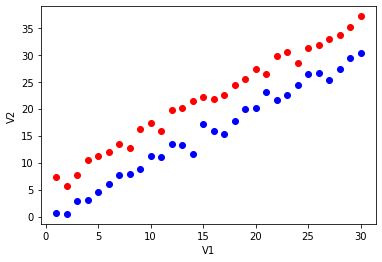

In [53]:
plt.plot(group1.iloc[:,0],group1.iloc[:,1],"ro")
plt.plot(group2.iloc[:,0],group2.iloc[:,1],"bo")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

Yes, there is a clear separation of the raw data (as shown above).

### (2) Apply your own PCA class to this dataset without scaling the two variables. Project the raw data onto your first principal component axis, i.e. the PC1 axis.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


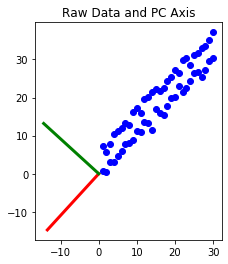

In [54]:
Question2 = DoPCA()
Q2 = Question2.PCA(data,False)

The Red Line is PC1; The Green line is PC2.

### (3) Add the PC1 axis to the plot you obtained in (1).

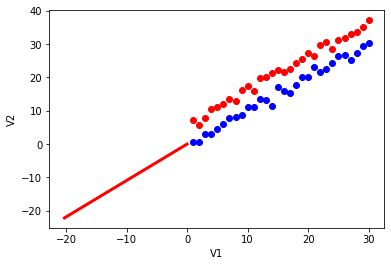

In [55]:
k = 30
eigenvectors = Q2['loadings']

plt.plot(group1.iloc[:,0],group1.iloc[:,1],"ro")
plt.plot(group2.iloc[:,0],group2.iloc[:,1],"bo")
plt.xlabel("V1")
plt.ylabel("V2")
plt.plot([0, (-1)*k*eigenvectors[0,0]], [0, (-1)*k*eigenvectors[1,0]], color='red', linewidth=3)
plt.show()

### (4) Apply your own LDA class to this dataset and obtain W. The class information of each data point is in the label column.

In [56]:
Question4 = LDA2classes()
Q4 = Question4.doLDA("./dataset_1.csv",0,1)
print(Q4['W'])

[[4495.         4581.47195687]
 [4581.47195687 4733.28896285]]
(2, 2)
[-0.09913814  0.09726698]


### (5) Project your raw data onto W. Do you see a clear separation of the data in the projection onto W?

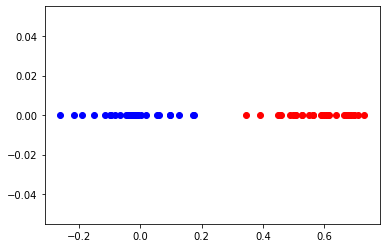

In [70]:
w_points_g1 = []
for i in range(group1.shape[0]):
    x = group1.iloc[i,0:group1.shape[1]-1]
    val = np.matmul(x,Q4['W'].T)
    w_points_g1.append(val)
g1_zeros = []
for i in range(len(w_points_g1)):
    g1_zeros.append(0)

w_points_g2 = []
for i in range(group2.shape[0]):
    x = group2.iloc[i,0:group2.shape[1]-1]
    val = np.matmul(x,Q4['W'].T)
    w_points_g2.append(val)
g2_zeros = []
for i in range(len(w_points_g2)):
    g2_zeros.append(0)

plt.plot(w_points_g1, g1_zeros, 'ro')
plt.plot(w_points_g2, g2_zeros, 'bo')


### (6) Add the W axis to your plot. At this point, your plot should contain the raw data points, the PC1 axis you obtain from the PCA analysis, and the W axis you obtain from the LDA analysis.

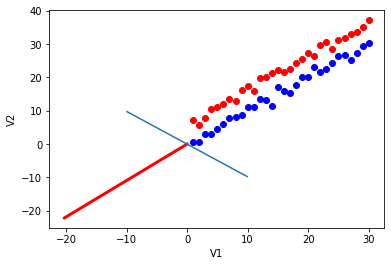

In [87]:
k = 30
w_multiplier = 100
eigenvectors = Q2['loadings']

x_values = [-Q4['W'][0]*w_multiplier, Q4['W'][0]*w_multiplier]
y_values = [-Q4['W'][1]*w_multiplier, Q4['W'][1]*w_multiplier]

#x_values = [0, Q4['W'][0]*w_multiplier]
#y_values = [0, Q4['W'][1]*w_multiplier]

plt.plot(group1.iloc[:,0],group1.iloc[:,1],"ro")
plt.plot(group2.iloc[:,0],group2.iloc[:,1],"bo")
plt.xlabel("V1")
plt.ylabel("V2")
plt.plot([0, (-1)*k*eigenvectors[0,0]], [0, (-1)*k*eigenvectors[1,0]], color='red', linewidth=3)
plt.plot(x_values, y_values)
plt.show()

### (7) Compute the variance of the projections onto the W axis.

In [80]:
print(Q4['variance'])

[0.2935140863721563, 0.30896856251895516]


### (8) What message can you get from the above PCA and LDA analyses?

The message I get from the above PCA and LDA analyses is that LDA does a better job seperating the data into groups while PCA is better at dimension reduction.

In [ ]:
data = pd.read_csv("./dataset_1.csv")
#data
data.columns[-1]

In [ ]:
group1 = data[data.iloc[:,-1] == 0]
group1

In [ ]:
#data.head()

In [ ]:
#data.shape

In [ ]:
#data["label"]
#data[data["label"] == 1]

In [ ]:
#data.shape[1]-1

In [ ]:
#data.iloc[0]

In [ ]:
#group1 = data[data["label"] == 1]
#list1 = []
#for a in range(group1.shape[1]-1):
#    list1.append(0)
#print(list1)
#x1 = np.array(list1)
#print(μ1)
#for b in range(group1.shape[0]):
#    x1 = np.add(x1,group1.iloc[b,0:group1.shape[1]-1])
    
#μ1 = x1/group1.shape[0]

In [ ]:
#μ1

In [ ]:
#S1 = 0
#for i in range(group1.shape[0]):
#    m1 = np.subtract(group1.iloc[i,0:group1.shape[1]-1],μ1) # (X - μ1)
#    m2 = m1.T  # (X - μ1)^T
#    S1 = S1 + np.matmul(m1,m2)
    
#print(S1) 4604.183640313355

S1 = np.matrix('0 0; 0 0') #This needs to be a dxd matrix
for i in range(group1.shape[0]):
    m1 = np.subtract(group1.iloc[i,0:group1.shape[1]-1],μ1) # (X - μ1) 1xd
    #print(m1)
    m2 = m1.T  # (X - μ1)^T dx1
    #print(m2)
    S1 = S1 + np.matmul(m2,m1)
print(S1)


In [49]:
Test1 = LDA2classes()
x = Test1.doLDA("./dataset_1.csv",0,1)

[[4495.         4581.47195687]
 [4581.47195687 4733.28896285]]
(2, 2)


In [50]:
x['variance']

[0.2935140863721563, 0.30896856251895516]

In [51]:
x['W']

array([-0.09913814,  0.09726698])

In [24]:
abc = [0,0,0]
cba = [0,0,0]

ccc = []
ccc.append(abc)
ccc.append(cba)
ccc = np.asarray(ccc)

aaa = np.asmatrix(ccc)
print(aaa)

[[0 0 0]
 [0 0 0]]


In [27]:
n = 3
final_list = []
temp_list = []

for i in range(n):
    for j in range(n):
        temp_list.append(0)
    final_list.append(temp_list)
    temp_list = []
    
myMatrix = np.asmatrix(np.asarray(final_list))
print(myMatrix)

[[0 0 0]
 [0 0 0]
 [0 0 0]]
